[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TobGerken/ISAT300/blob/main/5_StandardErrorDemostration.ipynb)

# Starndard Error Demonstration


**This notebook is published on my github. It is publicly accessible, but you cannot save your changes to my github. Learning git & github is beyond the scope of this course. If you are familiar with github, you know that to do. If you don't know github, you can save a personal copy of the file to your google drive, so that you can save your changes and can access them at a later date**

This notebook is a continuation from previous classes:

1. [GettingStarted](https://github.com/TobGerken/ISAT300/blob/main/1_GettingStarted.ipynb)
2. [Data Visualization](https://github.com/TobGerken/ISAT300/blob/main/2_DataVisualization.ipynb)
3. [Heart Rate Lab Review](https://github.com/TobGerken/ISAT300/blob/main/3_HeartRateLabReview.ipynb)
4. [Temperature Response Lab Review](https://github.com/TobGerken/ISAT300/blob/main/4_TemperatureResponseLabReview.ipynb)

This notebook was created to demonstrate the relationship between standard deviation ($/sigma$) and standard error.

I am outlining here a simple experiment

Before we start we are importing a couple of libraries. 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')


## Our Experiment: The weight of mice

You are a biologist and you know that the average weight of mice is 20 grams. You also know that there is a variation in the weight of mice with a standard deviation of 5 grams. 

We can express this as:

$Weight_{mice} = 20 \pm 5 grams$  

and we would expect the weight of mice to mostly be within the range of 15 to 25 grams. 

As a biologist you go out to catch a single mouse. We simulate this here by drawing a sample from a random distribution with a mean of 20 and a standard deviation of 5. 

In [79]:
# np.random.normal(mean,standardDeviation)
mouse = np.random.normal(20,5)
print('The caught mouse weights: %5.2f grams' % mouse)

The caught mouse weights: 29.88 grams


This seems plausible. 
Now let's go out and catch 10 mice. 


The average weight of caught mice is: 18.74 grams


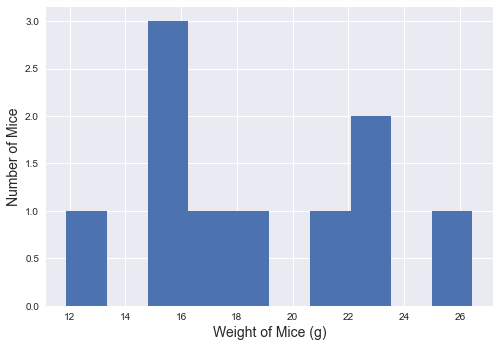

In [70]:
# np.random.normal(mean,standardDeviation,numberOfSamples)
mice = np.random.normal(20,5,10)
plt.hist(mice)
plt.xlabel('Weight of Mice (g)',fontsize = 14)
plt.ylabel('Number of Mice',fontsize = 14)

print('The average weight of caught mice is: %5.2f grams' % np.mean(mice))

This looks reasonable. Most caught might weigh in the range of 15-25 grams, but there might be some mice that are heavier or lighter. 

**Remember that $1\sigma$ corresponds to the range that encompasses 68.2% of the population.** 

We also see that the mean value of the mice we caught is no longer the mean value for all mice.

Now let's assume that 100 biologists go out and catch 10 mice each. This means we have 100 repetitions of our experiment. 

In [71]:
df = pd.DataFrame()
for i in range(100):
    x = np.random.normal(20,5,10)
    string = 'Mice_' + str(i)
    df[string]=x

df

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99
0,27.290094,21.469246,18.144953,25.448531,14.650151,22.569401,22.425738,32.431987,24.418794,19.058105,...,22.749876,24.028671,17.583061,19.515680,14.204499,14.333469,24.865612,19.164836,27.575425,13.760561
1,5.732760,25.313946,24.360221,9.904608,21.567112,25.864470,17.775454,20.458884,24.193661,11.588214,...,20.071164,13.851582,24.240729,17.940076,22.491910,17.044295,27.990051,26.407496,19.967461,22.985974
2,19.175997,19.397816,17.094620,15.893358,22.840474,24.049831,17.614689,13.100562,25.497035,22.886289,...,26.787043,20.829757,21.479256,23.024886,25.651847,17.692572,13.346139,21.702694,19.844764,12.239457
3,8.082003,23.147766,27.954149,17.920223,20.044769,17.570950,19.050867,16.490183,16.026523,22.155424,...,16.273576,20.075876,12.393028,14.140523,16.944883,23.908620,20.028879,20.770561,19.928250,27.461142
4,25.140993,10.446553,21.961991,15.871270,24.113403,15.933985,20.765379,23.378299,27.572363,16.672863,...,27.656079,9.947628,23.632890,12.878319,25.578323,13.390175,22.973833,18.424472,21.541248,26.451779
5,18.108447,12.703285,24.949086,18.181114,27.526560,26.662670,20.570575,27.251361,4.490695,24.054339,...,20.060936,27.445023,18.241179,17.758232,22.732086,23.332619,7.740703,18.297664,18.388523,16.889003
6,19.161258,13.503976,18.397215,22.920814,17.834170,25.754316,17.122982,20.951519,19.891832,13.225511,...,15.150834,17.422570,20.271874,20.506935,22.414435,16.535477,29.300299,15.735988,12.301897,25.237368
7,27.866002,19.618026,17.606620,20.149381,13.226847,21.057705,22.924821,9.711770,16.810949,17.575241,...,18.539931,19.943767,21.142498,14.089487,22.086000,17.882761,22.117792,16.543253,29.707917,13.473559
8,19.653527,22.724669,12.604265,20.831215,14.001032,27.624307,11.115468,18.409101,15.728833,22.164816,...,22.186477,20.043674,24.746023,20.811612,20.497181,20.897376,20.503274,17.430928,16.242306,19.607050
9,12.787163,24.127717,23.111759,26.735805,4.829485,15.169611,16.194070,13.765129,29.313921,20.399487,...,13.049208,17.561567,20.554988,13.392381,23.918037,23.168358,16.960160,22.970373,21.793074,17.930350


Each column in the dataframe corresponds to one biologist going out to capture and weigh 10 mice.  
Again, we can have a look at a plot for these. 

Text(0.5, 0, 'Weight of Mice (g)')

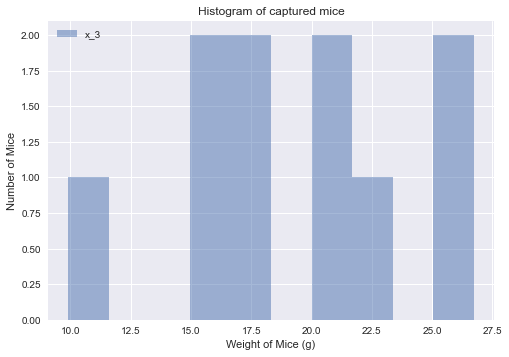

In [72]:
df[['x_3']].plot(kind = 'hist', title = 'Histogram of captured mice', alpha = 0.5)
plt.ylabel('Number of Mice')
plt.xlabel('Weight of Mice (g)')


Now let's have a look at the average weight and the average standard deviations for each of the samples. 

In [74]:
df.mean()

x_0     18.299824
x_1     19.245300
x_2     20.618488
x_3     19.385632
x_4     18.063400
          ...    
x_95    18.818572
x_96    20.582674
x_97    19.744827
x_98    20.729087
x_99    19.603624
Length: 100, dtype: float64

In [75]:
df.std()

x_0     7.566311
x_1     5.231194
x_2     4.611064
x_3     4.988756
x_4     6.598911
          ...   
x_95    3.794955
x_96    6.565933
x_97    3.257976
x_98    5.032272
x_99    5.656228
Length: 100, dtype: float64

We now have 100 samples and each of these samples provides an estimate of the mean weight of the mouse population.

Looking at the sample means and sample standard deviations, we can see that they are similar but not the same as the mean and the standard deviation of the mouse population ($20 \pm 5$).

Let's take this one step further and take the mean and standard deviation of for our 100 repetitions. 

In [78]:
means = df.mean()
print('The mean of the 100 means is: %5.2f +/- %5.2f grams' % (means.mean(), means.std()))

The mean of the 100 means is: 20.14 +/-  1.49 grams


We now have an estimate of the uncertainty for the mean weight of all the mice. And you notice that this mean value is smaller than the standard deviation of the mouse population, which was $20 \pm 5$ grams.

## The Standard Error of the Mean

There is an equation that can be used to estimate the uncertainty of the mean value based on repeated measurements. This is called the **_standard error of the mean_** often abbreviated to **SE**. 

SE is calculated as: 

$SE = \frac{\sigma}{\sqrt{n}}$

In [82]:
# Using our sigma = 5 and a sample size of 10 mice caught, we can estimate the standard error 
standardError = 5/np.sqrt(10)
print('The Standard Error is %5.2f grams' % standardError)

The Standard Error is  1.58 grams


This value is not too different from what we calculated using the 100 repetitions. 

In general, we can use the standard error calculation to estimate the uncertainty of the mean value of the measurements that we want to measure. Most of the time, we do not know the true $\sigma$ of what we want to measure. 

For example, since we have not caught and weighed all mice on Earth, we don't know whether the weight of mice has a standard deviation of 5 grams. 

In the case of our ONE biologist, who went out to capture 10 mice, we can calculate the sample mean weight and the sample standard deviation

In [89]:
sampleMean = np.mean(mice)
sampleStd  = np.std(mice)

print('Sample Mean: %5.2f grams, Sample StdDev: %5.2f grams' % (sampleMean, sampleStd))

Sample Mean: 18.74 grams, Sample StdDev:  4.35 grams


We can then also calculate the standard error using the sample standard deviation

In [91]:
SE = sampleStd / np.sqrt(10)
SE
print('The sample mean is: %5.2f +/- %5.2f grams' % (sampleMean, SE))

The sample mean is: 18.74 +/-  1.38 grams


We notice that this range of uncertainty for the mean actually encompasses the true mean of the mice population (20 grams).

## A few caveats

- In general, SE is only reliable if we have a large number of samples ($n$), because the sample standard deviation is a not ideal substitute for the true standard deviation of the population ($\sigma$). The sample standard deviation will be closer to $\sigma$ for large $n$. 
- 1 SE provides a 68% range for the mean. 
- 2 x SE ~ 95.4% and 3 x SE > 99%.